In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn import tree
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

In [3]:
pd.set_option('max_rows',500)

In [4]:
data = pd.read_csv("UniversalBank.csv")

In [5]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
data.shape

(5000, 14)

In [7]:
data.isnull().sum()

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [8]:
data.dtypes

ID                     int64
Age                   object
Experience            object
Income                object
ZIPCode                int64
Family                 int64
CCAvg                float64
Education              int64
Mortgage               int64
PersonalLoan           int64
SecuritiesAccount      int64
CDAccount              int64
Online                 int64
CreditCard             int64
dtype: object

In [9]:
data.describe()

,ID,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   object 
 2   Experience         5000 non-null   object 
 3   Income             5000 non-null   object 
 4   ZIPCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 547.0+ KB


In [11]:
data.replace('?',np.nan, inplace = True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                4998 non-null   object 
 2   Experience         5000 non-null   object 
 3   Income             4987 non-null   object 
 4   ZIPCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 547.0+ KB


In [13]:
data['Age'] = data['Age'].astype(float)

In [14]:
data['Income'] = data['Income'].astype(float)

In [15]:
#data['Experience'].astype(float)

In [16]:
data['Experience'].unique()

array(['1', '19', '15', '9', '8', '13', '27', '24', '10', '39', '5', '23',
       '32', '41', '30', '14', '18', '21', '28', '31', '11', '16', '20',
       '35', '6', '25', ',', '12', '26', '37', '17', '2', '36', '29', '3',
       '7', '22', '-1', '34', '0', '38', '40', '33', '4', '-2', '42',
       '-3', '43'], dtype=object)

In [17]:
data['Experience'].value_counts()

32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
24    131
3     129
14    127
30    126
16    126
34    125
27    125
17    125
22    124
29    124
7     120
15    119
6     119
8     119
10    118
33    117
13    117
37    116
11    116
36    114
21    113
4     113
31    104
12    102
38     88
2      85
39     85
1      74
0      66
40     57
41     43
-1     33
-2     15
42      8
-3      4
43      3
,       2
Name: Experience, dtype: int64

In [18]:
data['Experience'] = data['Experience'].replace(',', np.nan)

In [19]:
data['Experience']=data['Experience'].astype(float)

In [20]:
data['Experience']=data.apply(lambda x: np.nan if (x.Experience<0) else x.Experience, axis=1)

In [21]:
data['Experience'].value_counts()

32.0    154
20.0    148
9.0     147
5.0     146
23.0    144
35.0    143
25.0    142
28.0    138
18.0    137
19.0    135
26.0    134
24.0    131
3.0     129
14.0    127
16.0    126
30.0    126
27.0    125
17.0    125
34.0    125
22.0    124
29.0    124
7.0     120
8.0     119
15.0    119
6.0     119
10.0    118
13.0    117
33.0    117
11.0    116
37.0    116
36.0    114
4.0     113
21.0    113
31.0    104
12.0    102
38.0     88
2.0      85
39.0     85
1.0      74
0.0      66
40.0     57
41.0     43
42.0      8
43.0      3
Name: Experience, dtype: int64

In [22]:
data['Experience']=data['Experience'].astype(float)

In [23]:
data.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,4998.000000,4946.000000,4987.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.336335,20.334614,73.807098,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.460241,11.312504,46.037325,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,11.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [24]:
data.dtypes

ID                     int64
Age                  float64
Experience           float64
Income               float64
ZIPCode                int64
Family                 int64
CCAvg                float64
Education              int64
Mortgage               int64
PersonalLoan           int64
SecuritiesAccount      int64
CDAccount              int64
Online                 int64
CreditCard             int64
dtype: object

In [25]:
data['Experience'].unique()

array([ 1., 19., 15.,  9.,  8., 13., 27., 24., 10., 39.,  5., 23., 32.,
       41., 30., 14., 18., 21., 28., 31., 11., 16., 20., 35.,  6., 25.,
       nan, 12., 26., 37., 17.,  2., 36., 29.,  3.,  7., 22., 34.,  0.,
       38., 40., 33.,  4., 42., 43.])

In [26]:
data['Age'].unique()

array([25., 45., 39., 35., 37., 53., 50., nan, 65., 29., 48., 59., 60.,
       38., 42., 46., 55., 56., 57., 44., 36., 43., 40., 30., 31., 51.,
       34., 32., 61., 41., 28., 49., 47., 62., 58., 54., 33., 27., 66.,
       24., 52., 26., 64., 63., 23., 67.])

In [27]:
data['Age'].value_counts()

35.0    151
43.0    149
52.0    145
54.0    143
58.0    143
50.0    138
41.0    136
30.0    136
56.0    135
39.0    133
34.0    133
59.0    132
57.0    132
51.0    129
46.0    127
60.0    127
45.0    127
42.0    126
31.0    125
40.0    125
55.0    125
62.0    123
29.0    123
61.0    122
44.0    121
32.0    120
33.0    120
48.0    118
49.0    115
38.0    115
47.0    113
53.0    112
63.0    108
36.0    107
37.0    106
28.0    103
27.0     91
65.0     80
64.0     78
26.0     78
25.0     53
24.0     28
66.0     24
23.0     12
67.0     11
Name: Age, dtype: int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                4998 non-null   float64
 2   Experience         4946 non-null   float64
 3   Income             4987 non-null   float64
 4   ZIPCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 547.0 KB


In [29]:
data.isnull().sum()

ID                    0
Age                   2
Experience           54
Income               13
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
PersonalLoan          0
SecuritiesAccount     0
CDAccount             0
Online                0
CreditCard            0
dtype: int64

In [30]:
data.shape

(5000, 14)

In [31]:
data = data.dropna(axis = 0)

In [32]:
data.shape

(4931, 14)

In [33]:
data.isnull().sum()

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4931 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 4931 non-null   int64  
 1   Age                4931 non-null   float64
 2   Experience         4931 non-null   float64
 3   Income             4931 non-null   float64
 4   ZIPCode            4931 non-null   int64  
 5   Family             4931 non-null   int64  
 6   CCAvg              4931 non-null   float64
 7   Education          4931 non-null   int64  
 8   Mortgage           4931 non-null   int64  
 9   PersonalLoan       4931 non-null   int64  
 10  SecuritiesAccount  4931 non-null   int64  
 11  CDAccount          4931 non-null   int64  
 12  Online             4931 non-null   int64  
 13  CreditCard         4931 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 577.9 KB


In [35]:
data.drop('ZIPCode', axis=1, inplace=True)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4931 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 4931 non-null   int64  
 1   Age                4931 non-null   float64
 2   Experience         4931 non-null   float64
 3   Income             4931 non-null   float64
 4   Family             4931 non-null   int64  
 5   CCAvg              4931 non-null   float64
 6   Education          4931 non-null   int64  
 7   Mortgage           4931 non-null   int64  
 8   PersonalLoan       4931 non-null   int64  
 9   SecuritiesAccount  4931 non-null   int64  
 10  CDAccount          4931 non-null   int64  
 11  Online             4931 non-null   int64  
 12  CreditCard         4931 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 539.3 KB


In [37]:
for col in ['Education', 'PersonalLoan', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard']:
    data[col] = data[col].astype('category')


In [38]:
data.dtypes

ID                      int64
Age                   float64
Experience            float64
Income                float64
Family                  int64
CCAvg                 float64
Education            category
Mortgage                int64
PersonalLoan         category
SecuritiesAccount    category
CDAccount            category
Online               category
CreditCard           category
dtype: object

In [39]:
data.drop('ID', axis=1, inplace=True)

In [40]:
data.dtypes

Age                   float64
Experience            float64
Income                float64
Family                  int64
CCAvg                 float64
Education            category
Mortgage                int64
PersonalLoan         category
SecuritiesAccount    category
CDAccount            category
Online               category
CreditCard           category
dtype: object

In [41]:
for col in ['Education', 'PersonalLoan', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard']:
    print (data[col].value_counts())

1    2073
3    1476
2    1382
Name: Education, dtype: int64
0    4453
1     478
Name: PersonalLoan, dtype: int64
0    4418
1     513
Name: SecuritiesAccount, dtype: int64
0    4629
1     302
Name: CDAccount, dtype: int64
1    2944
0    1987
Name: Online, dtype: int64
0    3478
1    1453
Name: CreditCard, dtype: int64


In [42]:
data = pd.get_dummies(columns=['Education'], data=data, drop_first=True)
print (data.columns, data.shape)

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage',
       'PersonalLoan', 'SecuritiesAccount', 'CDAccount', 'Online',
       'CreditCard', 'Education_2', 'Education_3'],
      dtype='object') (4931, 13)


In [43]:
data.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Education_2,Education_3
0,25.0,1.0,49.0,4,1.6,0,0,1,0,0,0,0,0
1,45.0,19.0,34.0,3,1.5,0,0,1,0,0,0,0,0
2,39.0,15.0,11.0,1,1.0,0,0,0,0,0,0,0,0
3,35.0,9.0,100.0,1,2.7,0,0,0,0,0,0,1,0
4,35.0,8.0,45.0,4,1.0,0,0,0,0,0,1,1,0


In [44]:
X, y = data.loc[:,data.columns!='PersonalLoan'].values, data.loc[:,'PersonalLoan'].values

print(type(X))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

<class 'numpy.ndarray'>


In [45]:
X_train.shape

(3698, 12)

In [46]:
X_test.shape

(1233, 12)

In [47]:
data.shape

(4931, 13)

In [48]:
y_train.shape

(3698,)

In [49]:
y_test.shape

(1233,)

In [50]:
print(pd.value_counts(y_train))
print(pd.value_counts(y_test))

0    3325
1     373
dtype: int64
0    1128
1     105
dtype: int64


In [51]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [52]:
clf

DecisionTreeClassifier()

In [53]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [54]:
check_training_data = pd.DataFrame({'TrueValue':y_train, 'ModelValues':train_pred})

In [55]:
check_training_data.head(10)

,TrueValue,ModelValues
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [56]:
test = data.columns.tolist()

In [57]:
test

['Age',
 'Experience',
 'Income',
 'Family',
 'CCAvg',
 'Mortgage',
 'PersonalLoan',
 'SecuritiesAccount',
 'CDAccount',
 'Online',
 'CreditCard',
 'Education_2',
 'Education_3']

In [58]:
check_test_data = pd.DataFrame({'TrueValues':y_test, 'ModelValues':test_pred})

In [59]:
check_test_data.head(10)

,TrueValues,ModelValues
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,0,0
7,0,0
8,1,1
9,0,0


In [60]:
confusion_matrix_test = confusion_matrix(y_test, test_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)
print(confusion_matrix_test)

[[3325    0]
 [   0  373]]
[[1110   18]
 [   9   96]]


In [61]:
Accuracy_Train = (confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

In [62]:
Accuracy_Train

1.0

In [63]:
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

In [64]:
TNR_Train

1.0

In [65]:
TPR_Train

1.0

In [66]:
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9840425531914894
Test TPR:  0.9142857142857143
Test Accuracy:  0.9781021897810219


In [67]:
#Building Decision Tree Model using Variable Importance

clf = tree.DecisionTreeClassifier(max_depth=25)
clf = clf.fit(X_train, y_train)

#Predicting on Train and Test
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

#Getting evaluation metrics and evaluating model performance
confusion_matrix_test = confusion_matrix(y_test, test_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)
print(confusion_matrix_test)

#Calculate Accuracy, True Positive Rate and True Negative Rates
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test) 


[[3325    0]
 [   0  373]]
[[1110   18]
 [   9   96]]
Train TNR:  1.0
Train TPR:  1.0
Train Accuracy:  1.0
Test TNR:  0.9840425531914894
Test TPR:  0.9142857142857143
Test Accuracy:  0.9781021897810219


In [68]:
clf.feature_importances_

array([0.02654854, 0.01532688, 0.31302417, 0.23114547, 0.06742849,
       0.00501825, 0.00268355, 0.01531893, 0.00513625, 0.        ,
       0.16334616, 0.1550233 ])

In [69]:
features = data.columns

In [70]:
importances = clf.feature_importances_


In [71]:
indices = np.argsort(importances)[::-1]

In [72]:
indices

array([ 2,  3, 10, 11,  4,  0,  1,  7,  8,  5,  6,  9], dtype=int64)

In [73]:
pd.DataFrame([data.columns[indices],np.sort(importances)[::-1]])


,0,1,2,3,4,5,6,7,8,9,10,11
0,Income,Family,CreditCard,Education_2,CCAvg,Age,Experience,SecuritiesAccount,CDAccount,Mortgage,PersonalLoan,Online
1,0.313024,0.231145,0.163346,0.155023,0.0674285,0.0265485,0.0153269,0.0153189,0.00513625,0.00501825,0.00268355,0


In [74]:
data.columns[indices]

Index(['Income', 'Family', 'CreditCard', 'Education_2', 'CCAvg', 'Age',
       'Experience', 'SecuritiesAccount', 'CDAccount', 'Mortgage',
       'PersonalLoan', 'Online'],
      dtype='object')

In [75]:
np.sort(importances)

array([0.        , 0.00268355, 0.00501825, 0.00513625, 0.01531893,
       0.01532688, 0.02654854, 0.06742849, 0.1550233 , 0.16334616,
       0.23114547, 0.31302417])

In [76]:
np.sort(importances)[::-1]

array([0.31302417, 0.23114547, 0.16334616, 0.1550233 , 0.06742849,
       0.02654854, 0.01532688, 0.01531893, 0.00513625, 0.00501825,
       0.00268355, 0.        ])

In [77]:
clf.feature_importances_
features = data.columns
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
pd.DataFrame([data.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,10,11
0,Income,Family,CreditCard,Education_2,CCAvg,Age,Experience,SecuritiesAccount,CDAccount,Mortgage,PersonalLoan,Online
1,0.313024,0.231145,0.163346,0.155023,0.0674285,0.0265485,0.0153269,0.0153189,0.00513625,0.00501825,0.00268355,0


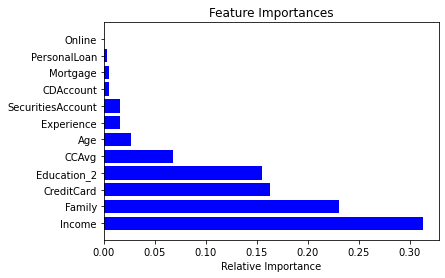

In [78]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [79]:
#Building Decision Tree Model using Variable Importance

clf = tree.DecisionTreeClassifier(max_depth=15)
clf = clf.fit(X_train, y_train)

#Predicting on Train and Test
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

#Getting evaluation metrics and evaluating model performance
confusion_matrix_test = confusion_matrix(y_test, test_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)
print(confusion_matrix_test)

#Calculate Accuracy, True Positive Rate and True Negative Rates
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test) 


[[3325    0]
 [   0  373]]
[[1111   17]
 [   8   97]]
Train TNR:  1.0
Train TPR:  1.0
Train Accuracy:  1.0
Test TNR:  0.9849290780141844
Test TPR:  0.9238095238095239
Test Accuracy:  0.9797242497972425


In [80]:
#Building Decision Tree Model using Variable Importance

clf = tree.DecisionTreeClassifier(max_depth=25)
clf = clf.fit(X_train, y_train)

#Predicting on Train and Test
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

#Getting evaluation metrics and evaluating model performance
confusion_matrix_test = confusion_matrix(y_test, test_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)
print(confusion_matrix_test)

#Calculate Accuracy, True Positive Rate and True Negative Rates
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test) 


[[3325    0]
 [   0  373]]
[[1110   18]
 [   7   98]]
Train TNR:  1.0
Train TPR:  1.0
Train Accuracy:  1.0
Test TNR:  0.9840425531914894
Test TPR:  0.9333333333333333
Test Accuracy:  0.9797242497972425


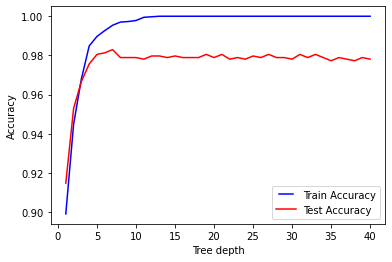

In [81]:
max_depths = np.linspace(1, 40, 40, endpoint=True)

train_results = []
test_results = []

for max_depth in max_depths:
    dt = tree.DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)

    train_pred = dt.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = dt.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

In [82]:
#Building Decision Tree Model using Variable Importance

clf = tree.DecisionTreeClassifier(max_depth=7)
clf = clf.fit(X_train, y_train)

#Predicting on Train and Test
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

#Getting evaluation metrics and evaluating model performance
confusion_matrix_test = confusion_matrix(y_test, test_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)
print(confusion_matrix_test)

#Calculate Accuracy, True Positive Rate and True Negative Rates
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test) 


[[3323    2]
 [  15  358]]
[[1118   10]
 [  13   92]]
Train TNR:  0.9993984962406015
Train TPR:  0.9597855227882037
Train Accuracy:  0.9954029204975663
Test TNR:  0.9911347517730497
Test TPR:  0.8761904761904762
Test Accuracy:  0.981346309813463


In [83]:
#Building Decision Tree Model using Variable Importance

clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)

#Predicting on Train and Test
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

#Getting evaluation metrics and evaluating model performance
confusion_matrix_test = confusion_matrix(y_test, test_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)
print(confusion_matrix_test)

#Calculate Accuracy, True Positive Rate and True Negative Rates
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test) 


[[3321    4]
 [  34  339]]
[[1119    9]
 [  16   89]]
Train TNR:  0.998796992481203
Train TPR:  0.9088471849865952
Train Accuracy:  0.989724175229854
Test TNR:  0.9920212765957447
Test TPR:  0.8476190476190476
Test Accuracy:  0.9797242497972425
